# Import packages:

In [1]:
import TESS_Localize as tl
import astropy.units as u
import lightkurve as lk

# Modes of interest and Target Pixel File setup:

In [2]:
low_frequency_list = [9.51112996, 19.02225993, 28.53338989, 38.04451986, 47.55564982, 57.06677979, 66.57790975, 76.08903972]

In [2]:
high_frequency_list = [500.559, 506.057, 642.255, 740.266, 884.017, 889.556, 957.817, 963.28, 969.013, 1028.729, 1034.356, 1107.713, 1212.297, 1217.872, 1223.429]

In [4]:
search_result = lk.search_targetpixelfile('TIC117070953',sector = 15)
tpf = search_result.download(quality_bitmask='default')

C:\Users\higgi\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


# Using TESS_Localize:

* Used in this example to show that two set of signals found in the pipeline aperture can be attributed to entirely different sources

In [5]:
low = tl.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 3)

In [5]:
high = tl.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 3)

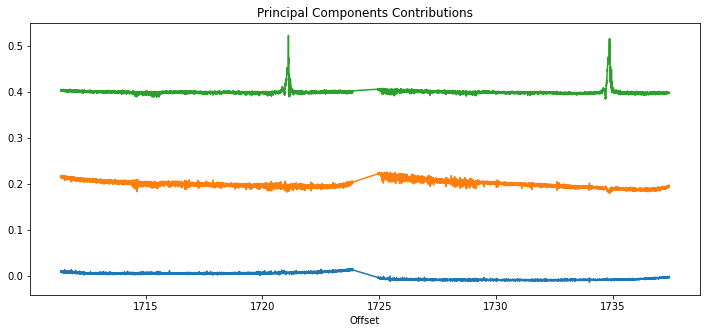

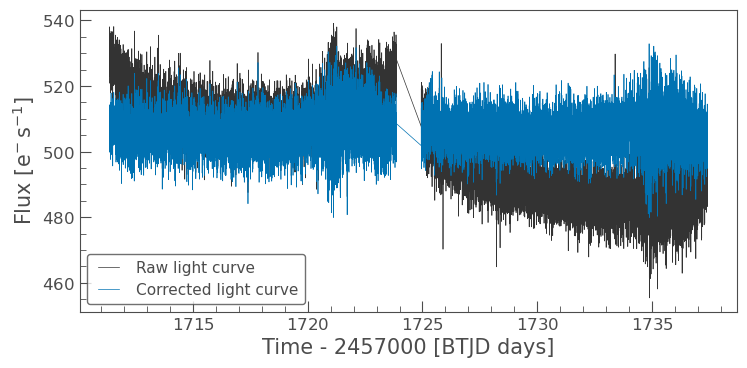

In [7]:
low.pca()

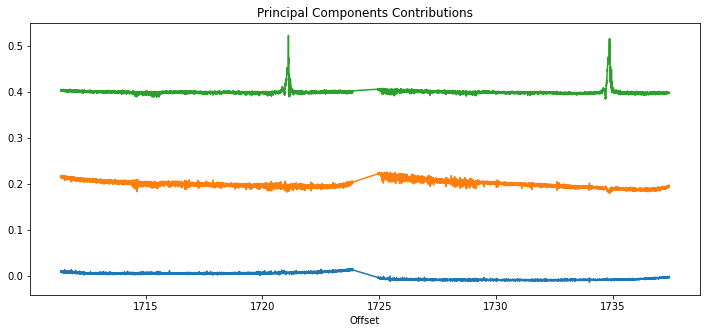

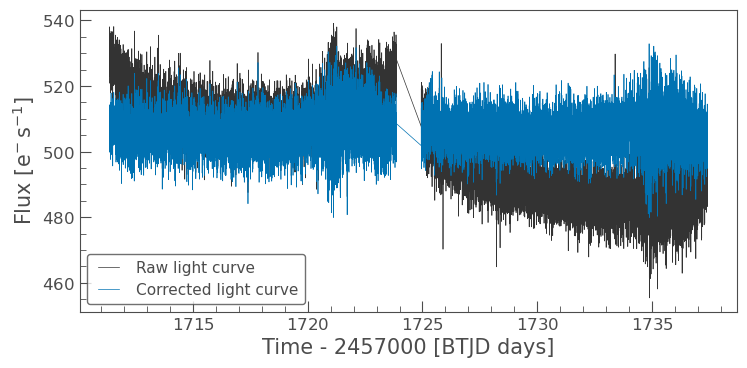

In [8]:
high.pca()

     index          ra        dec               source          x          y  \
0       89  319.294964  34.196133  1855294415817908480   5.876951   2.998218   
1       92  319.295630  34.196130  1855294415817907840   5.961744   2.957995   
2       75  319.292226  34.192087  1855294312738692480   5.237045   2.537803   
3       98  319.291908  34.201217  1855294415817910144   5.852838   3.964698   
4       86  319.289577  34.200021  1855294312738695296   5.469589   3.919459   
..     ...         ...        ...                  ...        ...        ...   
219    187  319.258799  34.263911  1855295545386531840   6.141734  15.608942   
220    208  319.289020  34.270607  1855295893286678272  10.473577  14.837415   
221    223  319.241740  34.258541  1867305137241296768   3.582052  15.799980   
222    219  319.216185  34.237633  1867304999802343552  -1.178783  14.104036   
223    185  319.256403  34.267368  1855295549689299840   6.085194  16.285082   

       distance  
0      0.005674  
1  

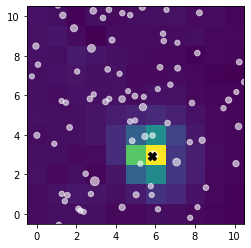

In [9]:
low.info()

     index          ra        dec               source          x          y  \
0      164  319.284473  34.207672  1855295171732158080   5.368918   5.404240   
1      166  319.283189  34.210540  1855295171732158592   5.411410   5.923105   
2      135  319.280163  34.209637  1855295068652944128   4.960772   5.964523   
3       85  319.283935  34.203068  1855294312738698112   4.969312   4.726386   
4       84  319.282486  34.202179  1855294312738698368   4.720665   4.675848   
..     ...         ...        ...                  ...        ...        ...   
219    206  319.333264  34.256258  1855295721487972352  15.080277   9.985208   
220    129  319.341387  34.249812  1855294965573724928  15.652669   8.506742   
221    219  319.216185  34.237633  1867304999802343552  -1.178783  14.104036   
222      0  319.295340  34.144230  1854918623361684352   2.193803  -5.027952   
223    185  319.256403  34.267368  1855295549689299840   6.085194  16.285082   

       distance  
0      0.005289  
1  

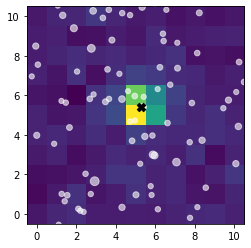

In [6]:
high.info()

<AxesSubplot:title={'center':'Target ID: 117070953, Cadence: 348415'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

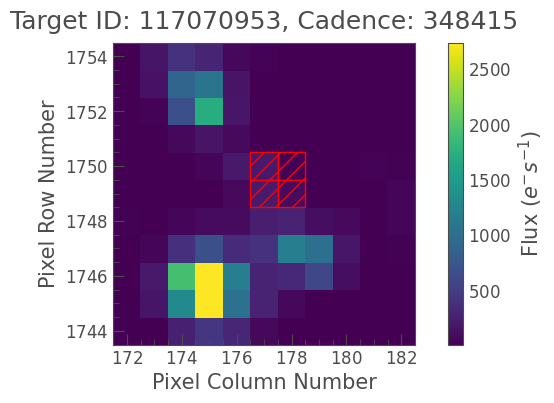

In [8]:
tpf.plot(aperture_mask = 'pipeline')

In [12]:
import matplotlib.pyplot as plt

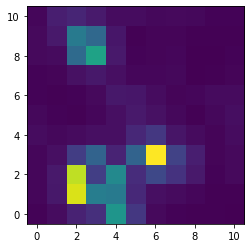

In [20]:
plt.imshow((high.heats_error[0]).reshape(11,11),origin = 'lower')

In [22]:
tpf.animate()

In [24]:
tpf.flux_bkg

<Quantity [[[198.65454, 198.65454, 198.65454, ..., 198.65454, 198.65454,
             198.65454],
            [198.65454, 198.65454, 198.65454, ..., 198.65454, 198.65454,
             198.65454],
            [198.65454, 198.65454, 198.65454, ..., 198.65454, 198.65454,
             198.65454],
            ...,
            [198.65454, 198.65454, 198.65454, ..., 198.65454, 198.65454,
             198.65454],
            [198.65454, 198.65454, 198.65454, ..., 198.65454, 198.65454,
             198.65454],
            [198.65454, 198.65454, 198.65454, ..., 198.65454, 198.65454,
             198.65454]],

           [[198.14494, 198.14494, 198.14494, ..., 198.14494, 198.14494,
             198.14494],
            [198.14494, 198.14494, 198.14494, ..., 198.14494, 198.14494,
             198.14494],
            [198.14494, 198.14494, 198.14494, ..., 198.14494, 198.14494,
             198.14494],
            ...,
            [198.14494, 198.14494, 198.14494, ..., 198.14494, 198.14494,
         

In [26]:
import numpy as np

In [44]:
b = np.array([0,1,20,3])
frq = np.array([1,2,3,4])*.111

In [45]:
np.argsort(b)[::-1]

array([2, 3, 1, 0], dtype=int64)

In [50]:
frq[np.argsort(b)[::-1]]

array([0.333, 0.444, 0.222, 0.111])

In [51]:
phase = np.zeros(4)

In [ ]:
phase[np.argsort(b)[::-1][i]] = 